<a href="https://colab.research.google.com/github/venkat2ram/Keras-and-Tensorflow/blob/master/uda_L10_NLP_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
path=keras.utils.get_file('reviews.csv','https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P')
dataset=pd.read_csv(path)
sentences=dataset['text']
labels=dataset['sentiment']

131072/127831 [==============================] - 0s 0us/step


In [3]:
import tensorflow_datasets as tfds
vocab_size=1000
tokenizer=tfds.features.text.SubwordTextEncoder.build_from_corpus(sentences, vocab_size, max_subword_length=5)

In [4]:
word=sentences[5]
print(word)
enc=tokenizer.encode(sentences[5])
print(enc)

I have to jiggle the plug to get it to line up right to get decent volume.
[4, 31, 6, 849, 162, 450, 12, 1, 600, 438, 775, 6, 175, 14, 6, 55, 213, 159, 474, 775, 6, 175, 614, 380, 295, 148, 72, 789]


In [5]:
for i in enc:
  print(tokenizer.decode([i]))

I 
have 
to 
j
ig
gl
e 
the 
pl
ug
 
to 
get 
it 
to 
li
ne 
up 
right
 
to 
get 
dec
ent 
vo
lu
me
.


In [6]:
for i, sentence in enumerate(sentences):
  sentences[i] = tokenizer.encode(sentence)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
sentences[5]

[4,
 31,
 6,
 849,
 162,
 450,
 12,
 1,
 600,
 438,
 775,
 6,
 175,
 14,
 6,
 55,
 213,
 159,
 474,
 775,
 6,
 175,
 614,
 380,
 295,
 148,
 72,
 789]

In [8]:
train_size=int(sentences.size*0.8)
sequence_size=50
padding_type='post'
truncating_type='post'

train_sentences=sentences[:train_size]
test_sentences=sentences[train_size:]

padded_train_sentences=pad_sequences(train_sentences,maxlen=sequence_size,padding=padding_type, truncating=truncating_type)
padded_test_sentences=pad_sequences(test_sentences,maxlen=sequence_size,padding=padding_type, truncating=truncating_type)

train_labels=labels[:train_size]
test_labels=labels[train_size:]

train_labels_final=np.array(train_labels)
test_labels_final=np.array(test_labels)

In [9]:
padded_test_sentences[5]

array([ 54,   9, 179,  60, 511, 789,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

# Model using Embedding

In [10]:
embedding_dim=16

model=tf.keras.models.Sequential(
    [tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=sequence_size),
     tf.keras.layers.Dense(6,activation='relu'),
     tf.keras.layers.Dense(1,activation='sigmoid')]
)

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            16000     
_________________________________________________________________
dense (Dense)                (None, 50, 6)             102       
_________________________________________________________________
dense_1 (Dense)              (None, 50, 1)             7         
Total params: 16,109
Trainable params: 16,109
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.fit(padded_train_sentences,train_labels_final,epochs=100,validation_data=(padded_test_sentences,test_labels_final))

Epoch 1/100
50/50 [==============================] - 0s 7ms/step - loss: 0.6914 - accuracy: 0.5314 - val_loss: 0.6982 - val_accuracy: 0.4542
Epoch 2/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6887 - accuracy: 0.5474 - val_loss: 0.6975 - val_accuracy: 0.4636
Epoch 3/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6862 - accuracy: 0.5505 - val_loss: 0.6951 - val_accuracy: 0.4690
Epoch 4/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6833 - accuracy: 0.5538 - val_loss: 0.6967 - val_accuracy: 0.4723
Epoch 5/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6807 - accuracy: 0.5560 - val_loss: 0.6976 - val_accuracy: 0.4743
Epoch 6/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6790 - accuracy: 0.5564 - val_loss: 0.6972 - val_accuracy: 0.4746
Epoch 7/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6779 - accuracy: 0.5576 - val_loss: 0.6972 - val_accuracy: 0.4731
Epoch 8/100
5

In [13]:
padded_test_sentences

array([[211, 284, 646, ...,   0,   0,   0],
       [413, 233,  31, ...,   0,   0,   0],
       [625, 633, 148, ...,   0,   0,   0],
       ...,
       [822, 500,  37, ...,   0,   0,   0],
       [ 13, 219, 147, ...,   0,   0,   0],
       [291,  38,  61, ..., 789,   0,   0]], dtype=int32)

Model using LSTM

In [14]:
model1=tf.keras.models.Sequential(
    [tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=sequence_size),
     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
     tf.keras.layers.Dense(6,activation='relu'),
     tf.keras.layers.Dense(1,activation='sigmoid')]
)
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
model1.fit(padded_train_sentences,train_labels_final,epochs=15,validation_data=(padded_test_sentences,test_labels_final))

Epoch 1/15
50/50 [==============================] - 1s 21ms/step - loss: 0.6907 - accuracy: 0.5191 - val_loss: 0.6992 - val_accuracy: 0.4110
Epoch 2/15
50/50 [==============================] - 0s 9ms/step - loss: 0.6562 - accuracy: 0.5876 - val_loss: 0.6363 - val_accuracy: 0.6767
Epoch 3/15
50/50 [==============================] - 0s 9ms/step - loss: 0.4963 - accuracy: 0.7884 - val_loss: 0.6662 - val_accuracy: 0.7293
Epoch 4/15
50/50 [==============================] - 0s 9ms/step - loss: 0.3679 - accuracy: 0.8487 - val_loss: 0.5208 - val_accuracy: 0.7669
Epoch 5/15
50/50 [==============================] - 0s 9ms/step - loss: 0.2822 - accuracy: 0.8983 - val_loss: 0.6471 - val_accuracy: 0.7619
Epoch 6/15
50/50 [==============================] - 0s 9ms/step - loss: 0.2294 - accuracy: 0.9184 - val_loss: 0.5787 - val_accuracy: 0.7569
Epoch 7/15
50/50 [==============================] - 0s 9ms/step - loss: 0.1945 - accuracy: 0.9379 - val_loss: 0.7230 - val_accuracy: 0.7694
Epoch 8/15
50/50 [=

# Model with two LSTM layers

In [94]:
model2=tf.keras.models.Sequential(
    [tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=sequence_size),
     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,return_sequences=True)),
     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,return_sequences=True)),
     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
     tf.keras.layers.Dense(6,activation='relu'),
     tf.keras.layers.Dense(1,activation='sigmoid')]
)
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [95]:
history2=model2.fit(padded_train_sentences,train_labels_final,epochs=15,validation_data=(padded_test_sentences,test_labels_final))

Epoch 1/15
50/50 [==============================] - 3s 54ms/step - loss: 0.6909 - accuracy: 0.5261 - val_loss: 0.6994 - val_accuracy: 0.4311
Epoch 2/15
50/50 [==============================] - 1s 23ms/step - loss: 0.6211 - accuracy: 0.6761 - val_loss: 0.5893 - val_accuracy: 0.7444
Epoch 3/15
50/50 [==============================] - 1s 22ms/step - loss: 0.4557 - accuracy: 0.8079 - val_loss: 0.6514 - val_accuracy: 0.7068
Epoch 4/15
50/50 [==============================] - 1s 22ms/step - loss: 0.3377 - accuracy: 0.8707 - val_loss: 0.5439 - val_accuracy: 0.7719
Epoch 5/15
50/50 [==============================] - 1s 22ms/step - loss: 0.2788 - accuracy: 0.9014 - val_loss: 0.5482 - val_accuracy: 0.7769
Epoch 6/15
50/50 [==============================] - 1s 22ms/step - loss: 0.2247 - accuracy: 0.9322 - val_loss: 0.7626 - val_accuracy: 0.7293
Epoch 7/15
50/50 [==============================] - 1s 22ms/step - loss: 0.2036 - accuracy: 0.9341 - val_loss: 0.5776 - val_accuracy: 0.7820
Epoch 8/15
50

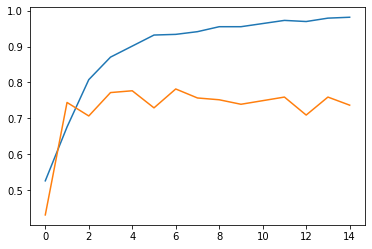

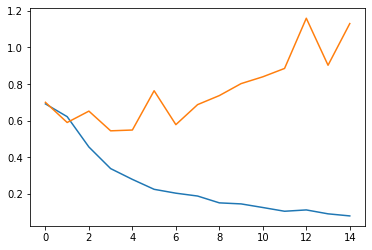

In [97]:
plt.clf()
plt.plot(history2.epoch,history2.history['accuracy'])
plt.plot(history2.epoch,history2.history['val_accuracy'])
plt.show()
plt.clf()
plt.plot(history2.epoch,history2.history['loss'])
plt.plot(history2.epoch,history2.history['val_loss'])
plt.show()

In [59]:
model3=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=sequence_size),
    tf.keras.layers.Conv1D(128,5,activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [60]:
model3.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(0.0001), 
                  metrics=['accuracy'])

In [61]:
model3.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 50, 16)            16000     
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 46, 128)           10368     
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 129       
Total params: 26,497
Trainable params: 26,497
Non-trainable params: 0
_________________________________________________________________


In [62]:
history3=model3.fit(padded_train_sentences,train_labels_final,epochs=33,validation_data=(padded_test_sentences,test_labels_final))

Epoch 1/33
50/50 [==============================] - 0s 6ms/step - loss: 0.6933 - accuracy: 0.5009 - val_loss: 0.6939 - val_accuracy: 0.4436
Epoch 2/33
50/50 [==============================] - 0s 4ms/step - loss: 0.6919 - accuracy: 0.5210 - val_loss: 0.6960 - val_accuracy: 0.4110
Epoch 3/33
50/50 [==============================] - 0s 4ms/step - loss: 0.6906 - accuracy: 0.5223 - val_loss: 0.6972 - val_accuracy: 0.4110
Epoch 4/33
50/50 [==============================] - 0s 5ms/step - loss: 0.6896 - accuracy: 0.5223 - val_loss: 0.6973 - val_accuracy: 0.4110
Epoch 5/33
50/50 [==============================] - 0s 4ms/step - loss: 0.6884 - accuracy: 0.5223 - val_loss: 0.6976 - val_accuracy: 0.4110
Epoch 6/33
50/50 [==============================] - 0s 4ms/step - loss: 0.6873 - accuracy: 0.5223 - val_loss: 0.6974 - val_accuracy: 0.4110
Epoch 7/33
50/50 [==============================] - 0s 4ms/step - loss: 0.6862 - accuracy: 0.5223 - val_loss: 0.6976 - val_accuracy: 0.4110
Epoch 8/33
50/50 [==

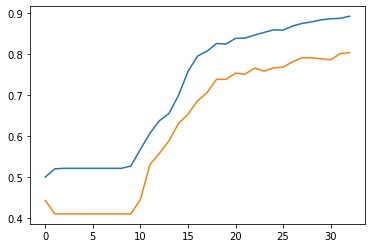

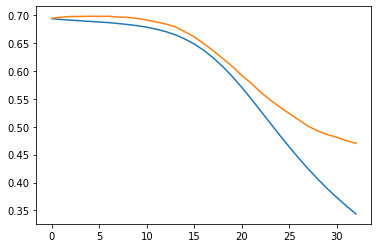

In [96]:
plt.clf()
plt.plot(history3.epoch,history3.history['accuracy'])
plt.plot(history3.epoch,history3.history['val_accuracy'])
plt.show()
plt.clf()
plt.plot(history3.epoch,history3.history['loss'])
plt.plot(history3.epoch,history3.history['val_loss'])
plt.show()

In [87]:
model4=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=sequence_size),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [88]:
model4.compile(optimizer=tf.keras.optimizers.Adam(0.0001),loss='binary_crossentropy',metrics='accuracy')

In [89]:
model4.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 50, 16)            16000     
_________________________________________________________________
bidirectional_6 (Bidirection (None, 64)                9600      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 65        
Total params: 25,665
Trainable params: 25,665
Non-trainable params: 0
_________________________________________________________________


In [90]:
history4=model4.fit(padded_train_sentences,train_labels_final,epochs=23,validation_data=(padded_test_sentences,test_labels_final))

Epoch 1/23
50/50 [==============================] - 1s 19ms/step - loss: 0.6922 - accuracy: 0.5292 - val_loss: 0.6963 - val_accuracy: 0.4135
Epoch 2/23
50/50 [==============================] - 0s 9ms/step - loss: 0.6913 - accuracy: 0.5229 - val_loss: 0.6967 - val_accuracy: 0.4135
Epoch 3/23
50/50 [==============================] - 0s 9ms/step - loss: 0.6903 - accuracy: 0.5235 - val_loss: 0.6985 - val_accuracy: 0.4110
Epoch 4/23
50/50 [==============================] - 0s 9ms/step - loss: 0.6893 - accuracy: 0.5229 - val_loss: 0.6980 - val_accuracy: 0.4135
Epoch 5/23
50/50 [==============================] - 0s 9ms/step - loss: 0.6878 - accuracy: 0.5229 - val_loss: 0.6982 - val_accuracy: 0.4135
Epoch 6/23
50/50 [==============================] - 0s 9ms/step - loss: 0.6856 - accuracy: 0.5235 - val_loss: 0.6972 - val_accuracy: 0.4185
Epoch 7/23
50/50 [==============================] - 0s 9ms/step - loss: 0.6824 - accuracy: 0.5374 - val_loss: 0.6963 - val_accuracy: 0.4261
Epoch 8/23
50/50 [=

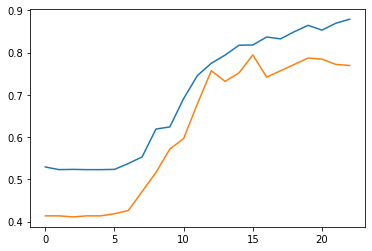

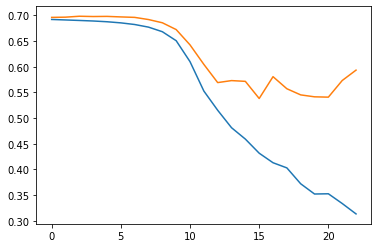

In [91]:
plt.clf()
plt.plot(history4.epoch,history4.history['accuracy'])
plt.plot(history4.epoch,history4.history['val_accuracy'])
plt.show()
plt.clf()
plt.plot(history4.epoch,history4.history['loss'])
plt.plot(history4.epoch,history4.history['val_loss'])
plt.show()

In [64]:
my_reviews =["lovely", "dreadful", "stay away",
             "everything was hot exactly as I wanted",
             "everything was not exactly as I wanted",
             "they gave us free chocolate cake",
             "I've never eaten anything so spicy in my life, my throat burned for hours",
             "for a phone that is as expensive as this one I expect it to be much easier to use than this thing is",
             "we left there very full for a low price so I'd say you just can't go wrong at this place",
             "that place does not have quality meals and it isn't a good place to go for dinner",
             ]

In [65]:
for i, sentence in enumerate(my_reviews):
  my_reviews[i] = tokenizer.encode(sentence)

In [66]:
padded_my_reviews=pad_sequences(my_reviews,maxlen=sequence_size,padding=padding_type, truncating=truncating_type)

In [67]:
pred=model.predict(padded_my_reviews)

In [ ]:
pred

In [69]:
model1.predict(padded_my_reviews)

array([[0.96830195],
       [0.04606463],
       [0.1019936 ],
       [0.77481997],
       [0.02345811],
       [0.45330968],
       [0.04356217],
       [0.04206901],
       [0.9999933 ],
       [0.5522172 ]], dtype=float32)

In [98]:
model2.predict(padded_my_reviews)

array([[0.99840325],
       [0.05090907],
       [0.99718314],
       [0.9908921 ],
       [0.03991449],
       [0.9978065 ],
       [0.03730655],
       [0.0352079 ],
       [0.9948938 ],
       [0.943513  ]], dtype=float32)

In [92]:
model3.predict(padded_my_reviews)

array([[0.72660226],
       [0.5659425 ],
       [0.49851432],
       [0.28057665],
       [0.11370637],
       [0.7033126 ],
       [0.5165923 ],
       [0.4147018 ],
       [0.63498366],
       [0.2525456 ]], dtype=float32)

In [93]:
model4.predict(padded_my_reviews)

array([[0.7396144 ],
       [0.4668646 ],
       [0.5675392 ],
       [0.2846506 ],
       [0.22574173],
       [0.7404975 ],
       [0.10538441],
       [0.17210533],
       [0.18368186],
       [0.7627597 ]], dtype=float32)

In [ ]:
["lovely", "dreadful", "stay away",
             "everything was hot exactly as I wanted",
             "everything was not exactly as I wanted",
             "they gave us free chocolate cake",
             "I've never eaten anything so spicy in my life, my throat burned for hours",
             "for a phone that is as expensive as this one I expect it to be much easier to use than this thing is",
             "we left there very full for a low price so I'd say you just can't go wrong at this place",
             "that place does not have quality meals and it isn't a good place to go for dinner",
             ]